In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Liver_data.csv',sep=';')

In [5]:
df.shape

(615, 13)

In [6]:
df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [8]:
# converting protein datatype 
# converting column to float
df['protein   '] = pd.to_numeric(df['protein   '], errors='coerce')

# Optional: remove extra spaces from column name and text
df.columns = df.columns.str.strip()
df['protein'] = pd.to_numeric(df['protein'], errors='coerce')
# If any value cannot be converted to a number, it will be replaced with NaN instead of raising an error.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    object 
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    object 
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     614 non-null    float64
dtypes: float64(10), int64(1), object(2)

In [10]:
df.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [11]:
# Missing values
df.isnull().sum()

category                       0
age                            0
sex                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        1
dtype: int64

In [12]:
# duplicates
df.duplicated().sum()

0

In [13]:
# split feature and target
target=df[['category']]
features=df.drop(columns=['category'])

In [14]:
features.shape

(615, 12)

In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         615 non-null    int64  
 1   sex                         615 non-null    object 
 2   albumin                     614 non-null    float64
 3   alkaline_phosphatase        597 non-null    float64
 4   alanine_aminotransferase    614 non-null    float64
 5   aspartate_aminotransferase  615 non-null    float64
 6   bilirubin                   615 non-null    float64
 7   cholinesterase              615 non-null    float64
 8   cholesterol                 605 non-null    float64
 9   creatinina                  615 non-null    float64
 10  gamma_glutamyl_transferase  615 non-null    float64
 11  protein                     614 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 57.8+ KB


In [16]:
# converting categorical column to numeric
# As sex is a nominal data we used OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
one_hot=OneHotEncoder()
fea=pd.DataFrame(one_hot.fit_transform(df[['sex']]).toarray(),columns=['male','female'])
features=features.join(fea)
features.drop(columns='sex',inplace=True)
features

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,male,female
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0.0,1.0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0.0,1.0
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0.0,1.0
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.0,1.0
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1.0,0.0
611,64,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1.0,0.0
612,64,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1.0,0.0
613,46,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1.0,0.0


In [17]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         615 non-null    int64  
 1   albumin                     614 non-null    float64
 2   alkaline_phosphatase        597 non-null    float64
 3   alanine_aminotransferase    614 non-null    float64
 4   aspartate_aminotransferase  615 non-null    float64
 5   bilirubin                   615 non-null    float64
 6   cholinesterase              615 non-null    float64
 7   cholesterol                 605 non-null    float64
 8   creatinina                  615 non-null    float64
 9   gamma_glutamyl_transferase  615 non-null    float64
 10  protein                     614 non-null    float64
 11  male                        615 non-null    float64
 12  female                      615 non-null    float64
dtypes: float64(12), int64(1)
memory usa

In [18]:
# missing values
features.isnull().sum()

age                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        1
male                           0
female                         0
dtype: int64

In [19]:
# SimpleImputer: Used to replace missing values
simple1=SimpleImputer(missing_values=np.nan,strategy='median')
features=pd.DataFrame(simple1.fit_transform(features),columns=features.columns)
features

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,male,female
0,32.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0.0,1.0
1,32.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0.0,1.0
2,32.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0.0,1.0
3,32.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.0,1.0
4,32.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62.0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1.0,0.0
611,64.0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1.0,0.0
612,64.0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1.0,0.0
613,46.0,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1.0,0.0


In [20]:
# missing values
features.isnull().sum()

age                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
male                          0
female                        0
dtype: int64

In [21]:
# duplicates
features.duplicated().sum()

0

In [22]:
# Checking the Multicolinearity
# Variance_Inflation_Factor
# It helps detect multicollinearity (when independent variables are highly correlated).
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=features.columns
vif['VIF']=[variance_inflation_factor(features.values,i) for i in range(len(features.columns))]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
12,female,149.837945
11,male,93.457869
9,gamma_glutamyl_transferase,1.763561
1,albumin,1.732763
4,aspartate_aminotransferase,1.671541
6,cholinesterase,1.585101
10,protein,1.571773
2,alkaline_phosphatase,1.385148
7,cholesterol,1.348443
5,bilirubin,1.282654


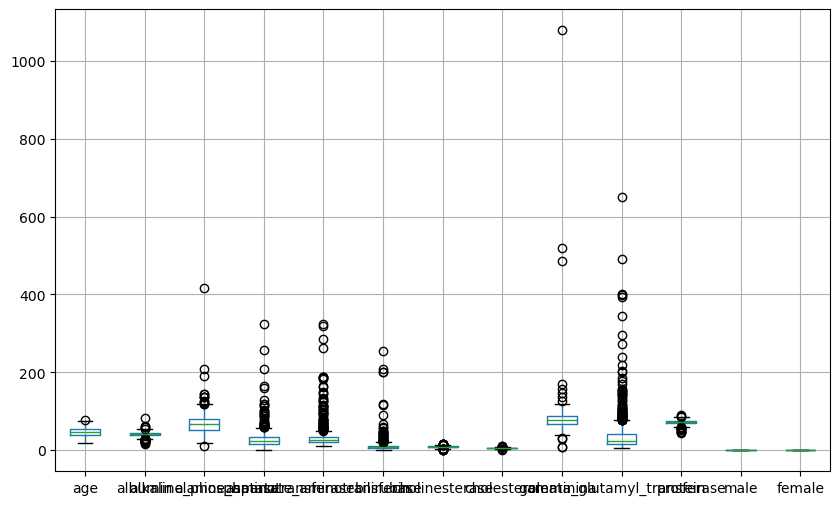

In [23]:
# outlier checking
plt.figure(figsize=(10,6))
features.boxplot()
plt.show()

In [24]:
# remove outliers(capping method)
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_Extreme=Q1-1.5*IQR
    Upper_Extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:Lower_Extreme if x<Lower_Extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in features.select_dtypes(['int','float']).columns:
    outlier_capping(features,col)

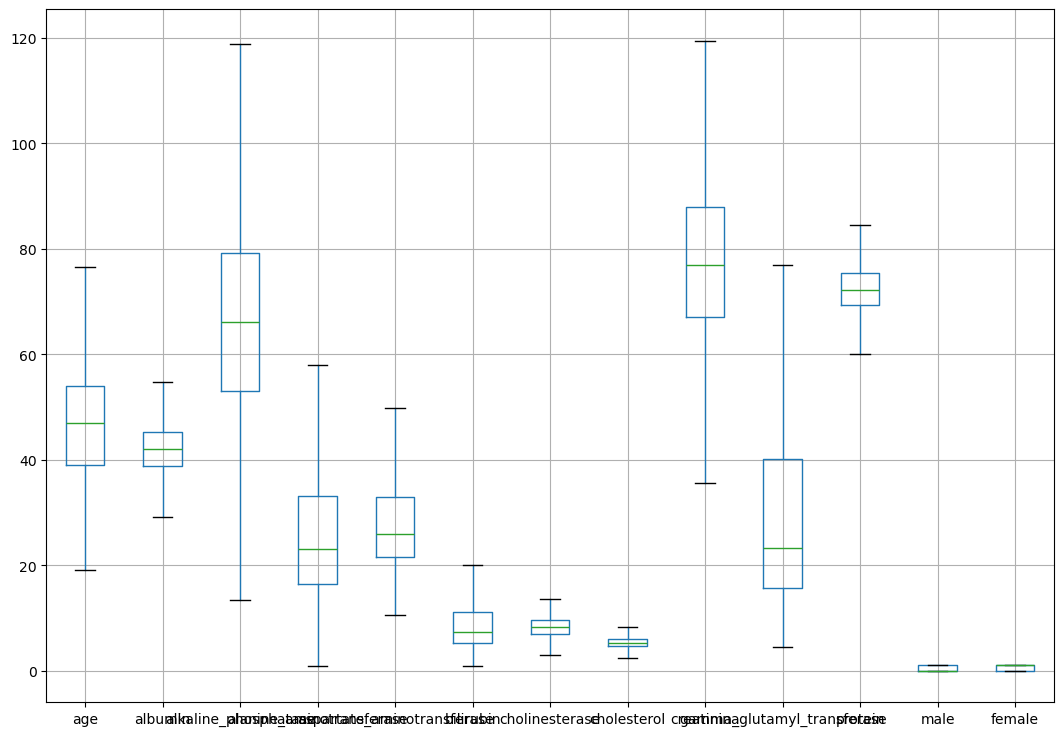

In [25]:
# after removing outliers
plt.figure(figsize=(13,9))
features.boxplot()
plt.show()

<Axes: >

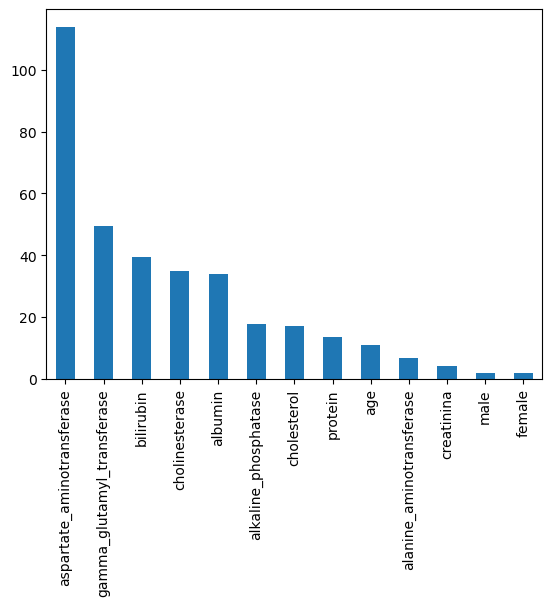

In [26]:
# feature selection
# f_classif helps to find how strongly each feature is related to the target variable
from sklearn.feature_selection import f_classif
f_class=f_classif(features,target)
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind="bar")

# High F-score: the feature has a stronger relationship with the target variable.
# Low F-score:the feature is less significant in predicting the target.

In [27]:
# features with low 
features.drop(columns=['age','alanine_aminotransferase','creatinina','male','female'],inplace=True)
features

,albumin,alkaline_phosphatase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,gamma_glutamyl_transferase,protein
0,38.5,52.500,22.10,7.50,6.9300,3.23,12.10,69.0
1,38.5,70.300,24.70,3.90,11.1700,4.80,15.60,76.5
2,46.9,74.700,49.85,6.10,8.8400,5.20,33.20,79.3
3,43.2,52.000,22.60,18.90,7.3300,4.74,33.80,75.7
4,39.2,74.100,24.80,9.60,9.1500,4.32,29.90,68.7
...,...,...,...,...,...,...,...,...
610,32.0,118.825,49.85,20.05,5.5700,6.30,76.95,68.5
611,29.2,102.800,44.40,20.00,2.9525,3.02,35.90,71.3
612,29.2,87.300,49.85,20.05,2.9525,3.63,64.20,82.0
613,33.0,66.200,49.85,20.00,3.5600,4.20,50.00,71.0


In [28]:
# LabelEncode:to convert target into numbers
lab_enc=LabelEncoder()
target=lab_enc.fit_transform(target)
target=pd.DataFrame(target,columns=['category'])
target.head()

,category
0,3
1,3
2,3
3,3
4,3


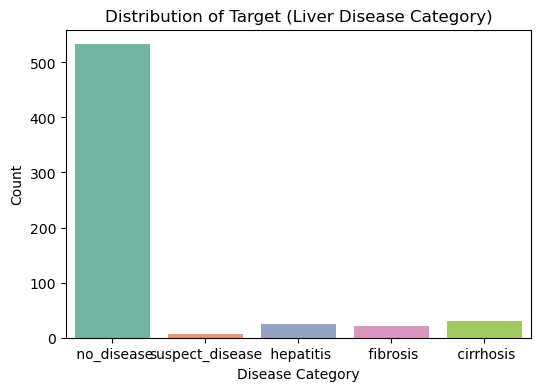

In [29]:
# Visualization
# count plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='category', palette="Set2")
plt.title("Distribution of Target (Liver Disease Category)")
plt.xlabel("Disease Category")
plt.ylabel("Count")
plt.show()

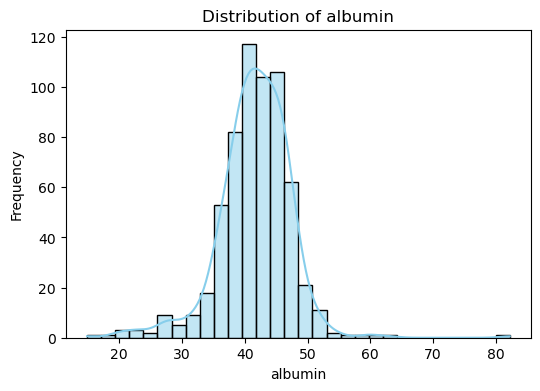

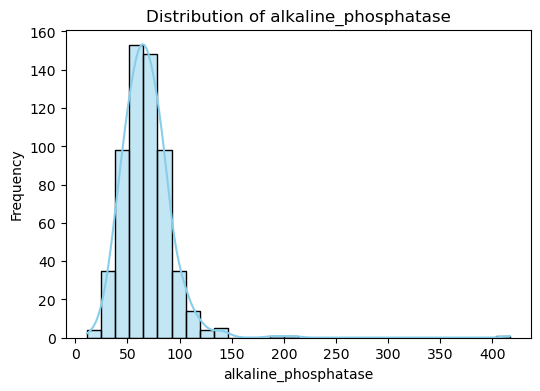

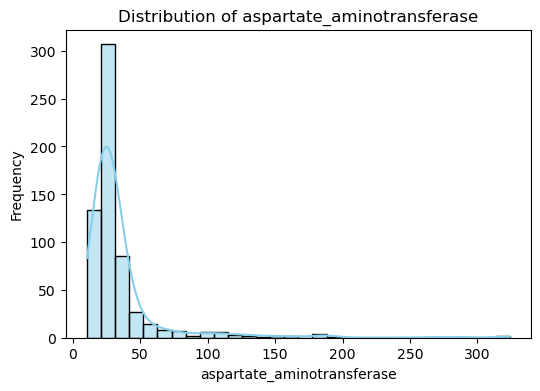

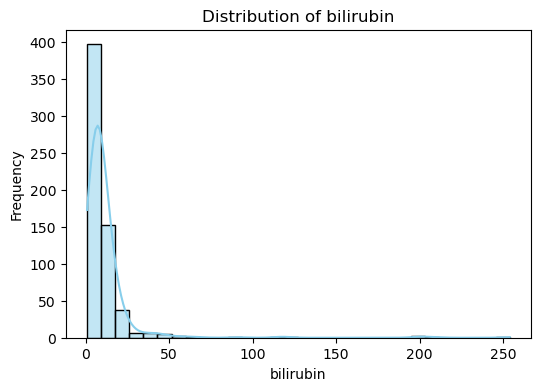

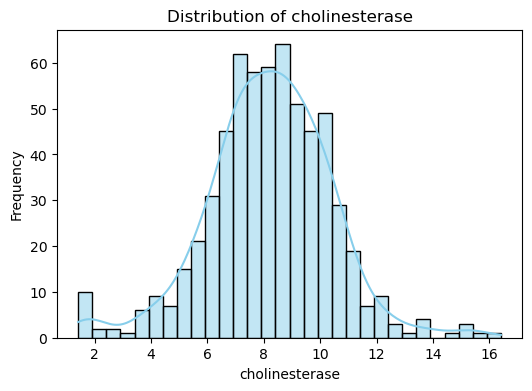

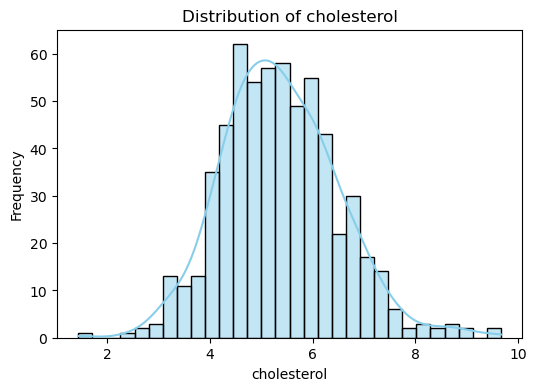

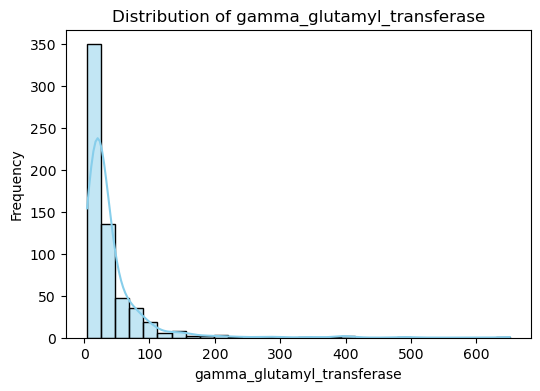

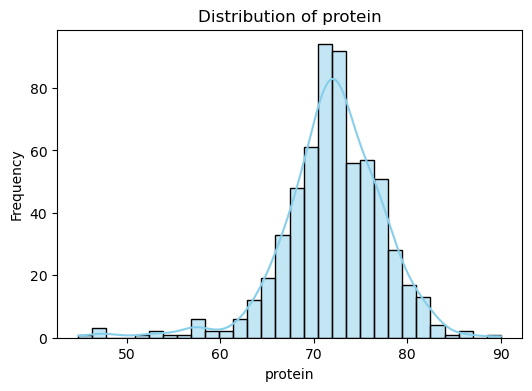

In [30]:
# Histogram for all numeric features
# The histogram shows the spread of data for column 
# The curve shows the shape of the distribution
# If it is bell-shaped: normally distributed.
# If it is skewed (long tail): not normally distributed, may need scaling
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True,bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: >

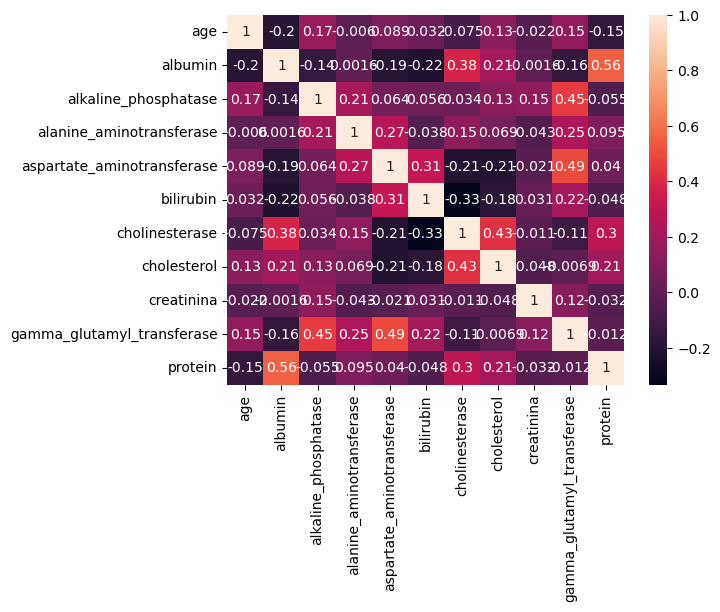

In [31]:
# correlation
# Select only numeric columns for correlation
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [32]:
# Train_Test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(461, 8)
(154, 8)
(461, 1)
(154, 1)


In [33]:
# Scaling
std_sca=StandardScaler()
features=pd.DataFrame(std_sca.fit_transform(features),columns=features.columns)
features.head()

,albumin,alkaline_phosphatase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,gamma_glutamyl_transferase,protein
0,-0.642747,-0.748053,-0.661420,-0.274541,-0.612353,-1.958618,-0.903424,-0.669572
1,-0.642747,0.152607,-0.399597,-0.991030,1.428327,-0.514037,-0.741189,0.897985
2,1.042880,0.375242,2.133046,-0.553176,0.306916,-0.145992,0.074621,1.483206
3,0.300401,-0.773352,-0.611070,1.994341,-0.419836,-0.569244,0.102432,0.730779
4,-0.502278,0.344883,-0.389526,0.143411,0.456117,-0.955693,-0.078344,-0.732274


In [36]:
# Model building
# Scale features for models like SVM, KNN, LR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [37]:

# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize model
log_reg = LogisticRegression(max_iter=2000)

# Train
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate
print("📊 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='macro'))
print("Recall:", recall_score(y_test, y_pred_lr, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='macro'))

print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


📊 Logistic Regression Results
Accuracy: 0.8766233766233766
Precision: 0.44029723557282613
Recall: 0.4603174603174603
F1 Score: 0.44604743083003956

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.29      0.22      0.25         9
           2       0.27      0.43      0.33         7
           3       0.98      0.98      0.98       126
           4       0.00      0.00      0.00         3

    accuracy                           0.88       154
   macro avg       0.44      0.46      0.45       154
weighted avg       0.87      0.88      0.87       154



In [38]:

# K-Nearest Neighbors Model

from sklearn.neighbors import KNeighborsClassifier

# Initialize model
knn = KNeighborsClassifier(n_neighbors=5)

# Train
knn.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
print("📊 KNN Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))

print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


📊 KNN Results
Accuracy: 0.8961038961038961
Precision: 0.5351560719981773
Recall: 0.4936507936507937
F1 Score: 0.503050193050193

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.55      0.67      0.60         9
           2       0.33      0.14      0.20         7
           3       0.94      0.99      0.97       126
           4       0.00      0.00      0.00         3

    accuracy                           0.90       154
   macro avg       0.54      0.49      0.50       154
weighted avg       0.87      0.90      0.88       154



In [39]:

# Support Vector Machine (RBF Kernel)

from sklearn.svm import SVC

# Initialize model
svm_model = SVC(kernel='rbf', probability=True)

# Train
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print("📊 SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='macro'))

print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


📊 SVM Results
Accuracy: 0.8766233766233766
Precision: 0.4642753623188406
Recall: 0.40634920634920635
F1 Score: 0.4222816399286987

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.33      0.11      0.17         9
           2       0.20      0.14      0.17         7
           3       0.91      1.00      0.95       126
           4       0.00      0.00      0.00         3

    accuracy                           0.88       154
   macro avg       0.46      0.41      0.42       154
weighted avg       0.83      0.88      0.85       154



In [40]:

# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt_model = DecisionTreeClassifier(random_state=42)

# Train
dt_model.fit(X_train_scaled, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate
print("📊 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall:", recall_score(y_test, y_pred_dt, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='macro'))

print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


📊 Decision Tree Results
Accuracy: 0.8506493506493507
Precision: 0.45959287531806614
Recall: 0.40634920634920635
F1 Score: 0.42360875867856873

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.33      0.22      0.27         9
           2       0.20      0.29      0.24         7
           3       0.93      0.97      0.95       126
           4       0.00      0.00      0.00         3

    accuracy                           0.85       154
   macro avg       0.46      0.41      0.42       154
weighted avg       0.84      0.85      0.84       154



In [41]:

# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)

# Train
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
print("📊 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall:", recall_score(y_test, y_pred_rf, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


📊 Random Forest Results
Accuracy: 0.8831168831168831
Precision: 0.5670092497430627
Recall: 0.48571428571428565
F1 Score: 0.5159029649595687

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.00      0.00      0.00         9
           2       0.43      0.43      0.43         7
           3       0.91      1.00      0.95       126
           4       0.50      0.33      0.40         3

    accuracy                           0.88       154
   macro avg       0.57      0.49      0.52       154
weighted avg       0.83      0.88      0.85       154



In [44]:

# Model Performance Comparison Table

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store model predictions in training order
models_summary = {
    "Logistic Regression": y_pred_lr,
    "KNN": y_pred_knn,
    "SVM (RBF Kernel)": y_pred_svm,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf
}

# Evaluate each model (in order)
results = []
for name, preds in models_summary.items():
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, preds), 4),
        "Precision (Macro)": round(precision_score(y_test, preds, average='macro'), 4),
        "Recall (Macro)": round(recall_score(y_test, preds, average='macro'), 4),
        "F1 Score (Macro)": round(f1_score(y_test, preds, average='macro'), 4)
    })

# Convert to DataFrame (preserve index order)
results_df = pd.DataFrame(results, index=models_summary.keys())

print(" Final Model Comparison (Preserving Training Order):\n")
display(results_df)



 Final Model Comparison (Preserving Training Order):



,Model,Accuracy,Precision (Macro),Recall (Macro),F1 Score (Macro)
Logistic Regression,Logistic Regression,0.8766,0.4403,0.4603,0.4460
KNN,KNN,0.8961,0.5352,0.4937,0.5031
SVM (RBF Kernel),SVM (RBF Kernel),0.8766,0.4643,0.4063,0.4223
Decision Tree,Decision Tree,0.8506,0.4596,0.4063,0.4236
Random Forest,Random Forest,0.8831,0.5670,0.4857,0.5159


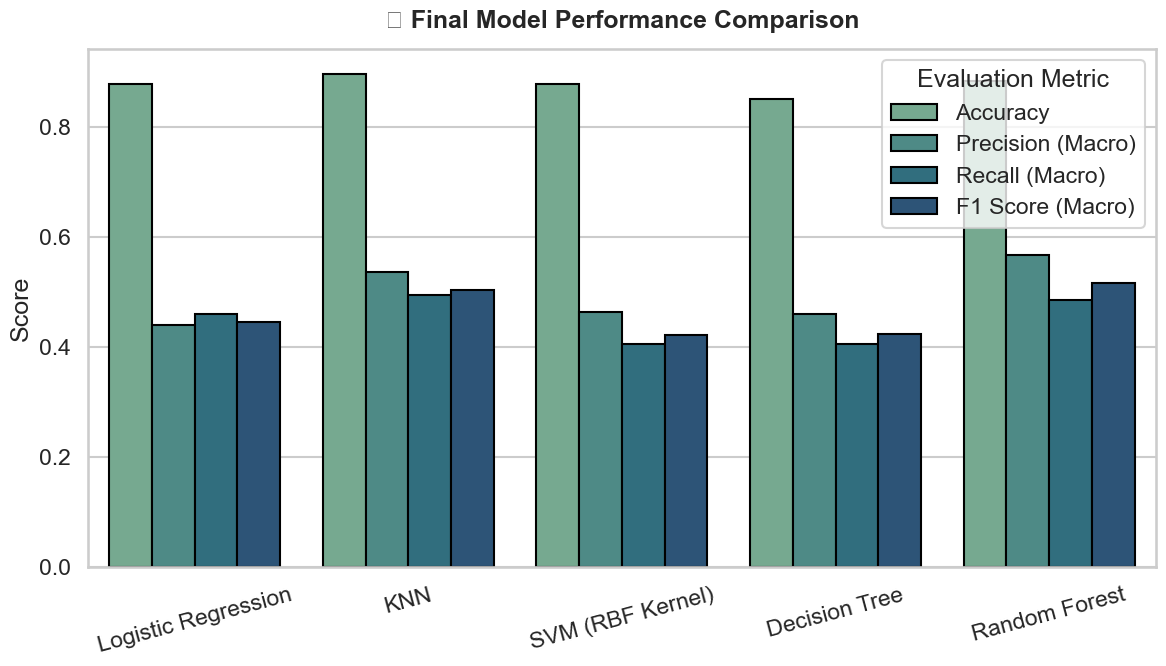

In [48]:
#  MODEL PERFORMANCE VISUALIZATION


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# (Assume `results_df` already exists)
# Ensure index is proper
results_df = results_df.reset_index(drop=True)

# Set Seaborn style
sns.set(style="whitegrid", context="talk")

# 1️⃣ Grouped Bar Chart for Metrics Comparison
fig, ax = plt.subplots(figsize=(12, 7))
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

sns.barplot(
    data=results_melted,
    x="Model", y="Score", hue="Metric",
    palette="crest", edgecolor="black", ax=ax
)

ax.set_title("📊 Final Model Performance Comparison", fontsize=18, fontweight="bold", pad=15)
ax.set_ylabel("Score")
ax.set_xlabel("")
plt.xticks(rotation=15)
ax.legend(title="Evaluation Metric")
plt.tight_layout()
plt.show()

